In [89]:
%matplotlib inline
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [90]:
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [91]:
filename = '../http_test.out'
with open(filename) as test_output:
    lines = test_output.readlines()
        
table = [[part for part in line.strip().split(' ') if part != ''] for line in lines]

In [92]:
def label_type (row):
    testname = row['name'].lower()
    if 'http' in testname:
        return 'http'
    if 'grpc' in testname:
        return 'grpc'
    return 'unknown'

def label_test_size (row):
    test_size = row['name'].split('Server')[1].split('-')[0]
    return int(test_size, 10)

bench_data = pd.DataFrame(table, columns=['name','iter','time','time_metric','throughput','throughput_metric','bytes','bytes_metric','allocs', 'allocs_metric'])
bench_data['type'] = bench_data.apply (lambda row: label_type(row),axis=1)
bench_data['test_size'] = bench_data.apply (lambda row: label_test_size(row),axis=1)

numeric_columns = ['iter','time','bytes', 'throughput','allocs']
bench_data[numeric_columns] = bench_data[numeric_columns].apply(pd.to_numeric)

bench_data['time_seconds'] = bench_data.apply(lambda row: row['time'] / 1000000000, axis=1)
bench_data['time_ms'] = bench_data.apply(lambda row: row['time'] / 1000000, axis=1)

bench_data.head(5)

big_bench_data = bench_data[bench_data['test_size'] >= 1000]


### Tempo

Menor é melhor, transferência mais rápida

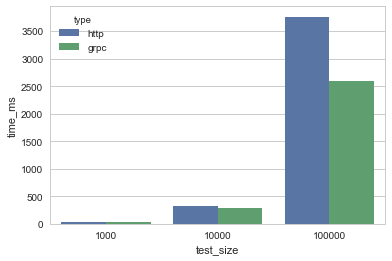

In [93]:
g = sns.barplot(x="test_size", y="time_ms", hue='type', data=big_bench_data)
#g.figure.get_axes()[0].set_yscale('log')
plt.show()

### Quantidade de dados gerado 
Menor é melhor, pois queremos reduzir trafego de dados na rede

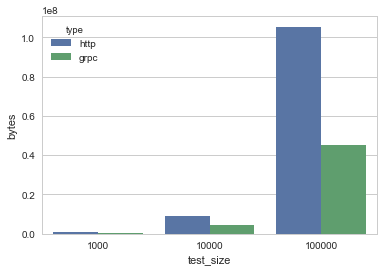

In [94]:
g = sns.barplot(x="test_size", y="bytes", hue='type', data=big_bench_data)
#g.figure.get_axes()[0].set_yscale('linear')
plt.show()

### Alocação de objetos 
Menor é melhor, menos uso de memória pela aplicação cliente

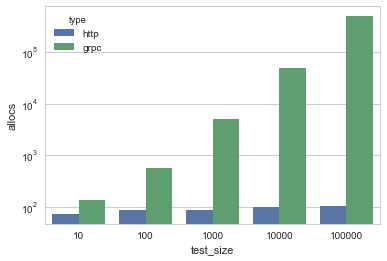

In [95]:
g = sns.barplot(x="test_size", y="allocs", hue='type', data=bench_data)
g.figure.get_axes()[0].set_yscale('log')
plt.show()

### Transferência de dados 
Menor é melhor neste caso, pois queremos reduzir trafego de dados na rede

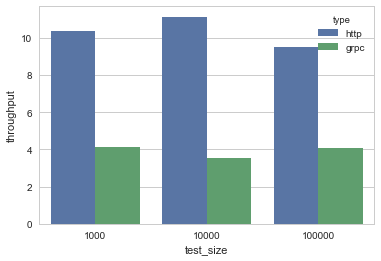

In [97]:
g = sns.barplot(x="test_size", y="throughput", hue='type', data=big_bench_data)
#g.figure.get_axes()[0].set_yscale('linear')
plt.show()